## Разведочный анализ данных. Исследование и визуализация данных.

### __Цель лабораторной работы:__ изучение различных методов визуализация данных.
 
### __Краткое описание.__ 
Построение основных графиков, входящих в этап разведочного анализа данных. Корреляционный анализ данных. Формирование выводов о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

Рекомендуемые инструментальные средства можно посмотреть здесь.

### Требования к отчету:
Отчет по лабораторной работе должен содержать:

- титульный лист;
- описание задания;
- текст программы;
- экранные формы с примерами выполнения программы.

В случае использования ноутбуков фрагменты 3 и 4 соответствуют ячейкам ноутбуков. Отчеты размещаются в репозитории курса, который каждый студент создает в своем профиле на github.

### Задание:

1. Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
Для лабораторных работ не рекомендуется выбирать датасеты большого размера.

2. Создать ноутбук, который содержит следующие разделы:

- Текстовое описание выбранного Вами набора данных.
- Основные характеристики датасета.
- Визуальное исследование датасета. Необходимо использовать не менее 2 различных библиотек и не менее 5 графиков.
- Информация о корреляции признаков.

3. Сформировать отчет и разместить его в своем репозитории на github.

Средства и способы визуализации данных можно посмотреть здесь.

В качестве опорного примера для выполнения лабораторной работы можно использовать пример.

Дополнительно примеры решения задач, содержащие визуализацию, можно посмотреть в репозитории курса mlcourse.ai - https://github.com/Yorko/mlcourse.ai/wiki/Individual-projects-and-tutorials-(in-Russian)

- - - - - - - -

# Analyzing cardiovascular disease data

dataset:

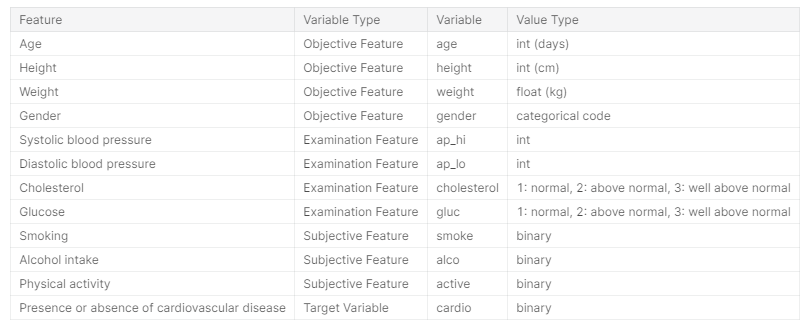

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(16,8)})

In [6]:
df = pd.read_csv('data/mlbootcamp5_train.csv')
df.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0


In [11]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
print('Количество пустых строк:')
df.isna().sum()

Количкство пустых строк:


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

0    35021
1    34979
Name: cardio, dtype: int64

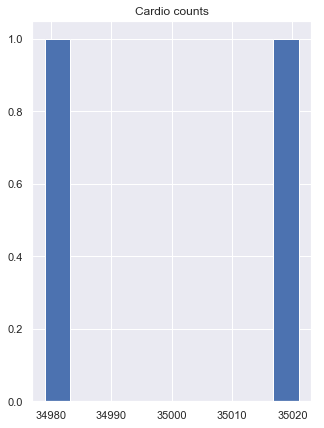

In [237]:
plt.title('Cardio counts')
df.cardio.value_counts().hist(figsize = (5,7))
df.cardio.value_counts()

Классы целевой переменной сбалансированны

## Построим гистограмму категориальных признаков

In [240]:
categ_columns = ['gender','cholesterol', 
                 'gluc', 'smoke', 'alco', 
                 'active', 'cardio']

df_uniques = df.melt(value_vars=categ_columns)


df_uniques = df_uniques.groupby(by=['variable', 'value'])\
                       .agg({'value':'count'})\
                       .rename(columns={'value':'count'})\
                       .sort_index(level=[0, 1])\
                       .reset_index()

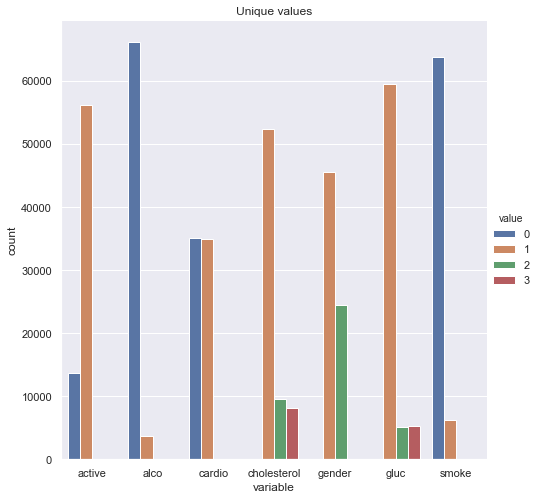

In [241]:
sns.catplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', height=7);
plt.title('Unique values');

In [106]:
df_uniques.head()

,variable,value,count
0,active,0,13739
1,active,1,56261
2,alco,0,66236
3,alco,1,3764
4,cardio,0,35021


In [111]:
categ_columns.remove('cardio')

In [118]:
df_unique_cardio = df.melt(value_vars=categ_columns, id_vars='cardio')\
            .groupby(by=['variable', 'value', 'cardio'])\
            .agg({'value':'count'})\
            .rename(columns={'value':'count'})\
            .reset_index()

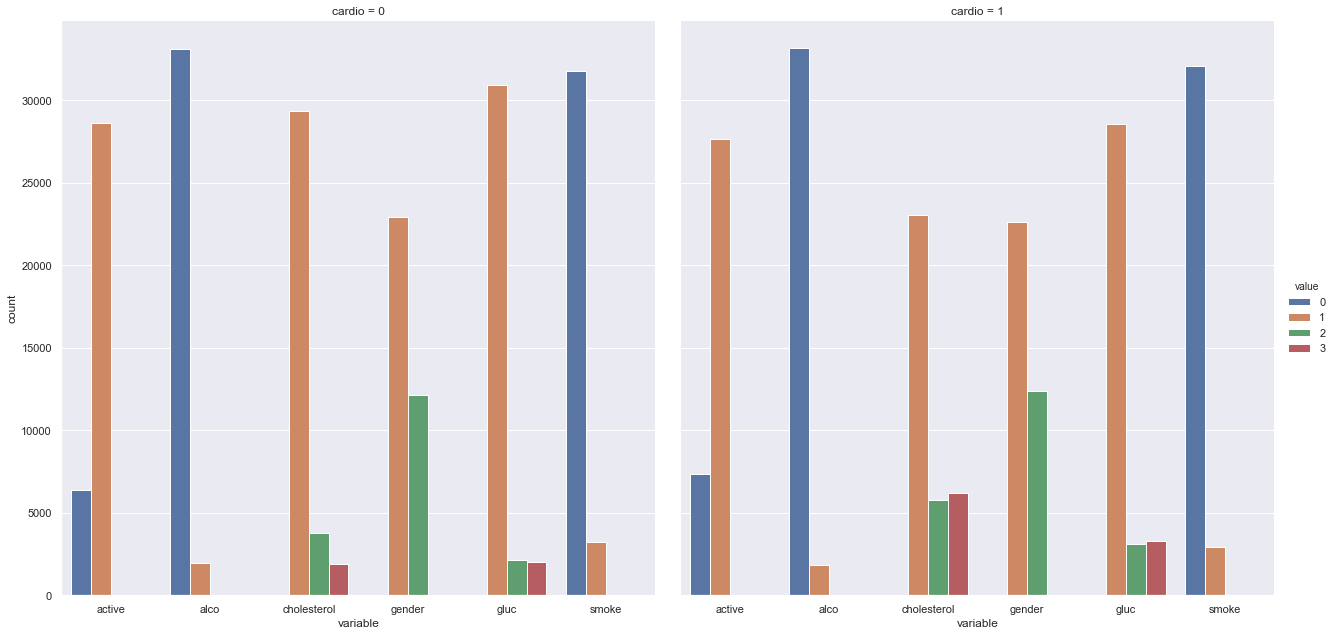

In [121]:
sns.catplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_unique_cardio, kind='bar', height=9);

### Unusefull graph (remove this later)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


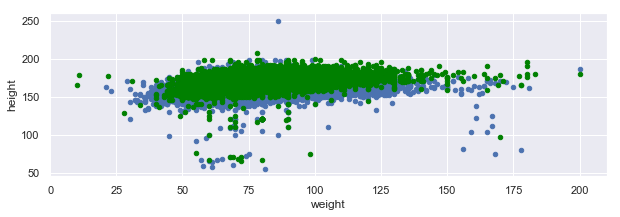

In [187]:
#ax = plt.plot()

#for val in df.gender.unique():
ax = df[df.gender == 1].loc[:, ['height', 'weight']].plot.scatter(x='weight', y='height')
df[df.gender == 2].loc[:, ['height', 'weight']].plot.scatter(x='weight', y='height', ax=ax, color='green');

In [233]:
#df.plot.scatter(x='weight', y='height')

### Расчитаем возраст пациентов и рассмотрим влияние возраста на появление заболевания

In [151]:
df['age_y'] = round(df.age/265.25)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_y
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,69.0,69.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,76.0,76.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,71.0,71.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,66.0,66.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,66.0,66.0


Text(0.5, 1.0, 'Age distribution')

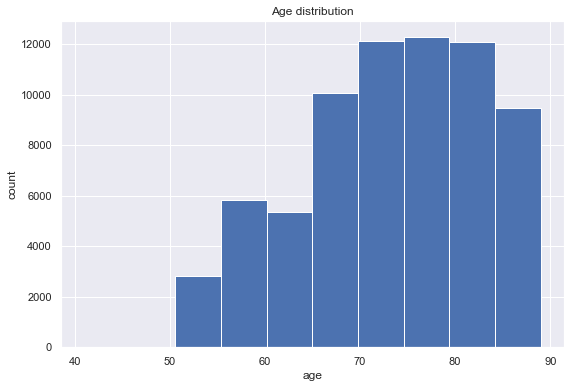

In [209]:
df.age_y.hist(figsize = (9,6))
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age distribution')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


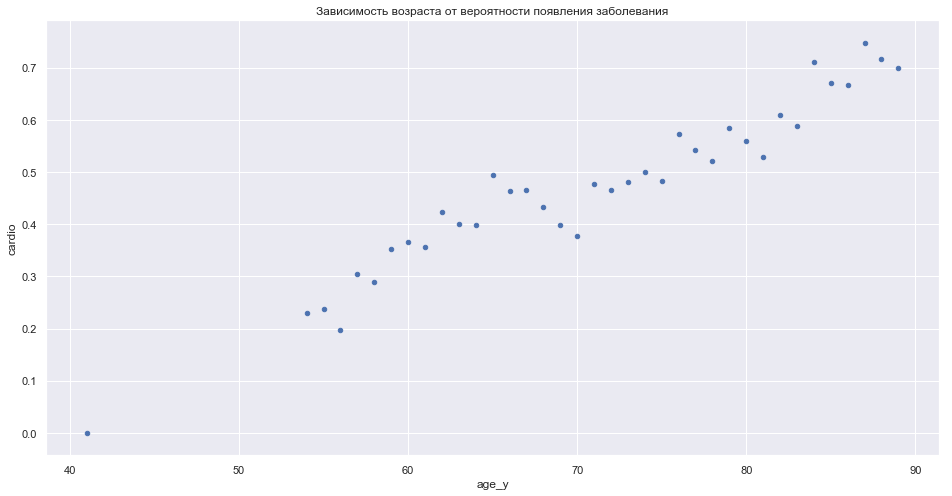

In [245]:
#df.hist(figsize = (9,6), by='gender')
df.groupby(by='age_y', as_index=False).agg({'cardio':'mean'})\
        .plot.scatter(x='age_y', y='cardio');
plt.title('Зависимость возраста от вероятности появления заболевания');

Как видно с возрастом повышается вероятность кардиоваскулярных заболеваний

### Рассмотрим корреляцию признаков при помощи температурной карты

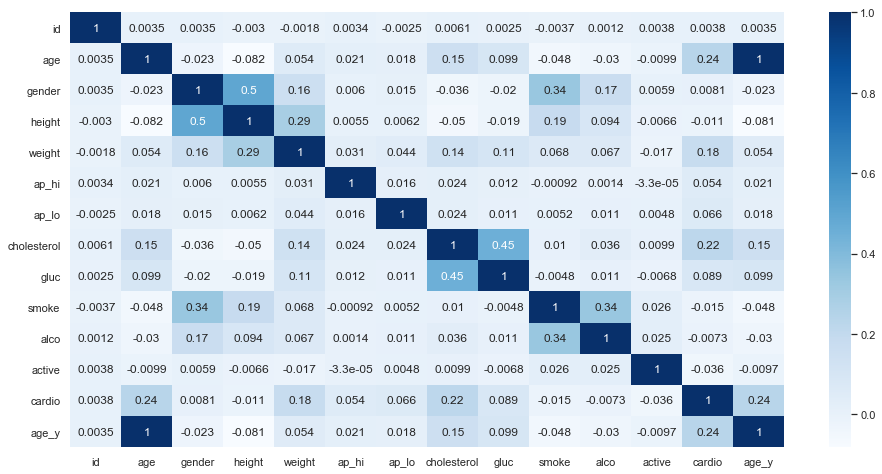

In [193]:
sns.set(rc={'figure.figsize':(16,8)})
ax = sns.heatmap(df.corr(), annot=True, cmap="Blues")

__Целевая переменная кардтозаболевания в наибольшей степени (однако довольно слабо) коррелирует с возрастом, весом, и холестирином и практически не связана с полом и алкоголем__